# **ADULT CENSUS INCOME PREDICTION**

In this Notebook ,I am going to show my work on the Adult Census Income dataset and how boosting can help increase our accuracy(even by small amount) ,especially using the XGBoost algorithm.

I am a beginner ,so please keep in mind that I may have not gone into greater depths of analysis and model tuning.I would greatly appreciate any suggestions so as to improve my model.

## Overview

*Prediction task is to determine whether a person makes over 50K or less in a year.*
 
 **Attributes**:

  *income*: >50K, <=50K

  *age*: continuous

  *workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,
  State-gov, Without-pay, Never-worked

  *fnlwgt*: continuous

  *education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, 
  Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, 
  Doctorate, 5th-6th, Preschool
  education-num: continuous
  
  *marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, 
  Widowed, Married-spouse-absent, Married-AF-spouse

  *occupation*: Tech-support, Craft-repair, Other-service, Sales, 
  Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,
  Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, 
  Protective-serv, Armed-Forces

  *relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, 
  Unmarried

  *race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

  *sex*: Female, Male

  *capital-gain*: continuous

  *capital-loss*: continuous

  *hours-per-week*: continuous

  *native-country*: United-States, Cambodia, England, Puerto-Rico, 
  Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, 
  Greece, South, China, Cuba, Iran, Honduras, Philippines, 
  Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland,
  France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti,
  Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand,
  Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

## Load libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import scikitplot as skplt


In [2]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

## Load Data

In [3]:
dataset=pd.read_csv("../../data/adult.csv")

### *Check for null values and show the datatypes*

In [4]:
print(dataset.isnull().sum())
print(dataset.dtypes)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


### *Look at data*

In [5]:
dataset.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [6]:
#removing '?' containing rows
dataset = dataset[(dataset != '?').all(axis=1)]
#label the income objects as 0 and 1
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})

In this dataset ,just by looking at the columns "education" and "education.num" you could say that they bot convey the same meaning,one just specifies the degree name and the other specifies a numerical value for that degree ,we could drop any one of these. Numerical data is preferrable so lets keep "education.num" and we can remove "education".The same could be said about "marital.status" and "relationship",here, generally one would assume income levels whether a person is married or not."relationship" indirectly conveys the same husband ,wife indirectly means the person is married others like child,etc says that person is single.Hence we can drop any one of these.

I will prove these in the following sections.

## Analyze data

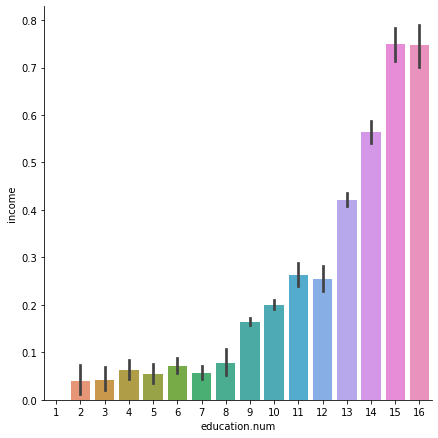

In [7]:
sns.catplot(x='education.num',y='income',data=dataset,kind='bar',height=6)
plt.show()

Higher the value ,higher the probability of income greater than 50k(Obviously!)

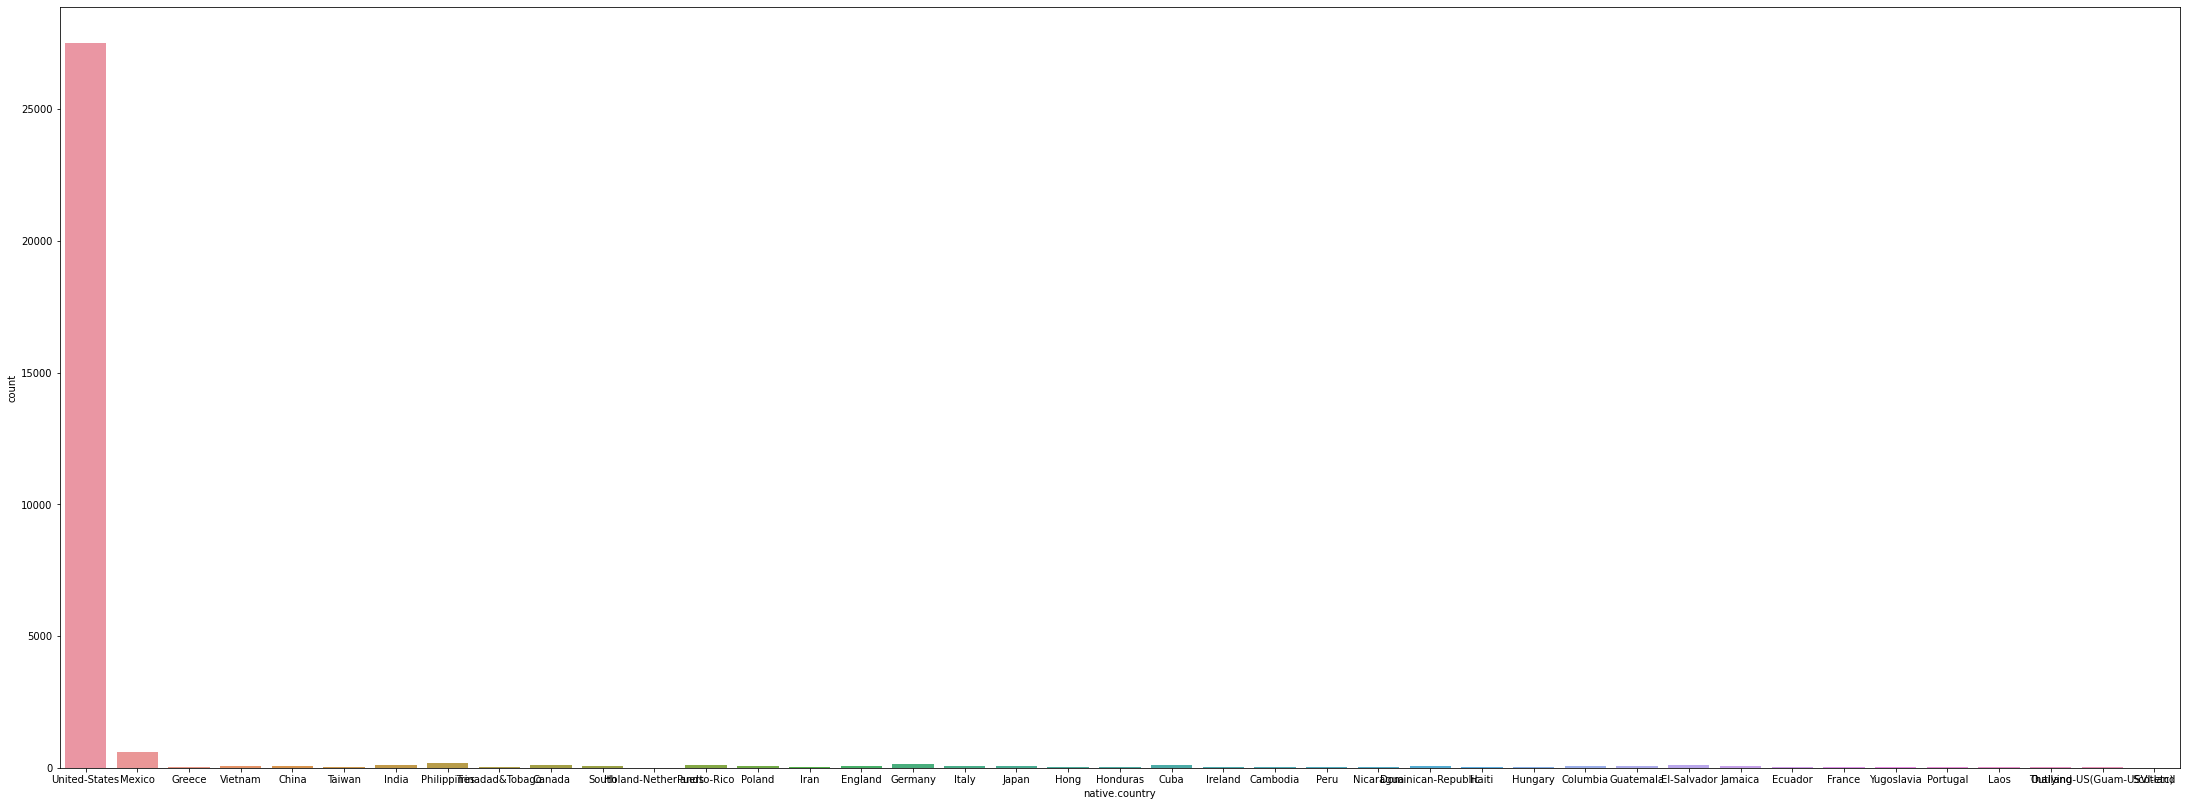

In [8]:
#explore which country do most people belong
plt.figure(figsize=(38,14))
sns.countplot(x='native.country',data=dataset)
plt.show()

Here most people are from the USA,so we can drop this column as it creates unnecessary bias.

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.


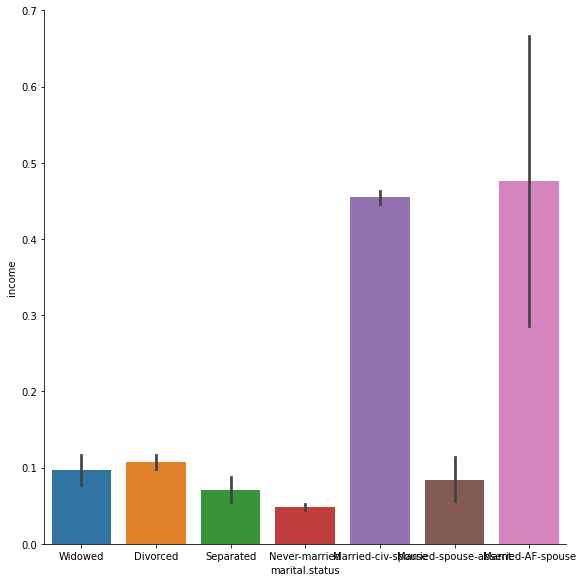

In [9]:
#marital.status vs income
sns.factorplot(x='marital.status',y='income',data=dataset,kind='bar',height=8)
plt.show()

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
The `size` parameter has been renamed to `height`; please update your code.


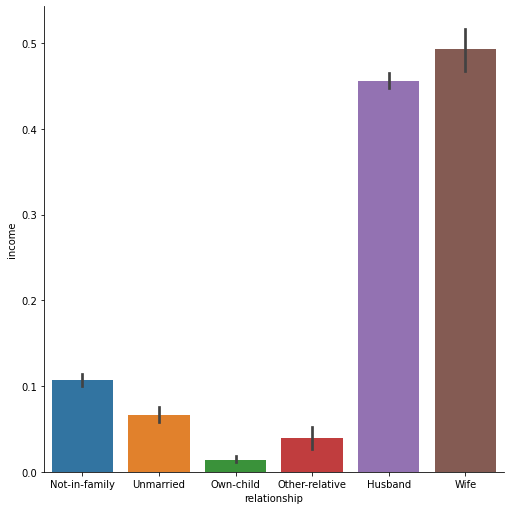

In [10]:
#relationship vs income
sns.factorplot(x='relationship',y='income',data=dataset,kind='bar',size=7)
plt.show()

Aha! You can clearly see that "relationship" and "marital.status", look similar i.e. tell us the same thing.

I will prove this now,first let us do some changes to data so it is simpler to understand.

## Feature Engineering

In [11]:
#we can reformat marital.status values to single and married
dataset['marital.status']=dataset['marital.status'].map({'Married-civ-spouse':'Married', 'Divorced':'Single', 'Never-married':'Single', 'Separated':'Single', 
'Widowed':'Single', 'Married-spouse-absent':'Married', 'Married-AF-spouse':'Married'})

 ### *Label encoding*

In [12]:
for column in dataset:
    enc=LabelEncoder()
    if dataset.dtypes[column]==np.object:
         dataset[column]=enc.fit_transform(dataset[column])

### *Correlation using heatmap*

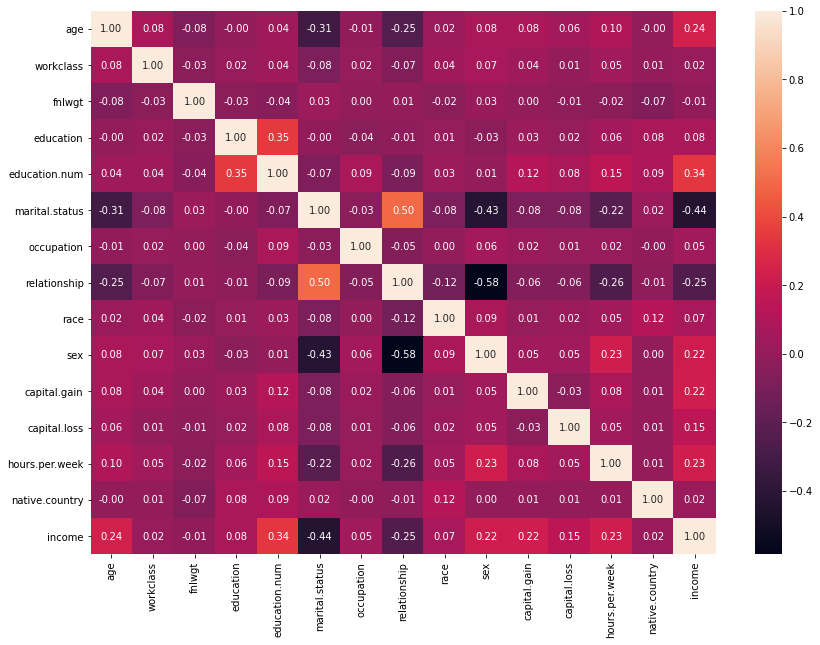

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f')
plt.show()

 As we can see from the heatmap "education" and "education.num" are highly correlated, same can be said about the "marital.status" and "relationship" ,thus,we can drop "relationship" and "education".

In [14]:
dataset=dataset.drop(['relationship','education'],axis=1)

 We can also drop "occupation" as "workclass" is sufficient.
Furthermore,"fnlwgt" is not useful to us as it refers to only the sampling in the census conducted and has no practical effect on the label.Also we  drop the "native.country" as more are from single country(USA) which can cause bias.

In [15]:
dataset=dataset.drop(['occupation','fnlwgt','native.country'],axis=1)

 Dataset after preprocessing

In [16]:
print(dataset.head())

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  income  
1          4356              18       0  
3          3900              40       0  
4          3900              40       0  
5          3770              45       0  
6          3770              40       0  


Split the dataset into predictors and target and make training and testing sets

In [17]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]
print(X.head())
print(y.head())
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,shuffle=False)

   age  workclass  education.num  marital.status  race  sex  capital.gain  \
1   82          2              9               1     4    0             0   
3   54          2              4               1     4    0             0   
4   41          2             10               1     4    0             0   
5   34          2              9               1     4    0             0   
6   38          2              6               1     4    1             0   

   capital.loss  hours.per.week  
1          4356              18  
3          3900              40  
4          3900              40  
5          3770              45  
6          3770              40  
1    0
3    0
4    0
5    0
6    0
Name: income, dtype: int64


 We use cross validation(CV) to select which model to use.In k-fold CV a model is trained using k-1  of the folds as training data.Then the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

In [ ]:
clf=GaussianNB()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

In [ ]:
clf=DecisionTreeClassifier()
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

In [19]:
clf=RandomForestClassifier(n_estimators=100)
cv_res=cross_val_score(clf,x_train,y_train,cv=10)
print(cv_res.mean()*100)

76.59856653651511


We use random forest as it is known for its robustness and less sensitivity.It is a bagging algorithm.

## Model Tuning

  Model Tuning is defined as tuning the parameters(hyperparameters) of our model so as to increase the performance of our classifier

### Gridsearch

 Instead of manually changing each parameter and comparing results,sklearn provides us with Gridsearch which uses crossvalidation to internally check all the parameters and compare results and gives us the best parameters as output.
 This is a time taking process.

In [ ]:
'''
---USED GRIDSEARCH FOR HYPERPARAMETER TUNING-----
clf=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3,4,5])
n_estimators=np.array([25,50,100,150,200])
min_samples_leaf=np.array([25,50,75,100])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=kf)
gres=grid.fit(x_train,y_train)
print("Best",gres.best_score_)
print("params",gres.best_params_)

----------------OUTPUT------------------------
Best 0.810471100554236
params {'max_features': 5, 'min_samples_leaf': 50, 'n_estimators': 50}
'''

#### Note:- This  cell is commented out as it takes long time to compute(15-20 mins)

## Finalize the Model

### *Fit the model with tuned parameters*

In [ ]:
clf=RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)
clf.fit(x_train,y_train)

### *Make predictions*

In [ ]:
pred=clf.predict(x_test)
pred

### *Evaluation metrics*

In [ ]:
print("Accuracy: %f " % (100*accuracy_score(y_test, pred)))

## **XGBoost**

Random forest follows the concept of bagging,the other method is boosting.In Boosting algorithms each classifier is trained on data, taking into account the previous classifiers’ success. After each training step, the weights are redistributed. Misclassified data increases its weights to emphasise the most difficult cases. In this way, subsequent learners will focus on them during their training.

Few boosting algorihtms are adaboost,gradientboosting,XGBoost.XGBoost is one of the most popular machine learning algorithm these days. 

[XGBoost](https://xgboost.readthedocs.io/en/latest/) (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core.

To install XGBoost on your system using [conda](https://anaconda.org/conda-forge/xgboost).

In [ ]:
import xgboost as xgb
xgb.__version__

As we have already done feature engineering etc. We can move on to tune the hyperparameters.Parameters can be found in the XGboost documetation.

But before that we have to convert data into Dmatrix (XGBoost uses data only in this format).

In [ ]:
dmat=xgb.DMatrix(x_train,y_train)
test_dmat=xgb.DMatrix(x_test)

## **Bayesian Optimization**

Grid and random search are completely uninformed by past evaluations, and as a result, often spend a significant amount of time evaluating “bad” hyperparameters.But bayesain optimization are informed of previous evaluations.A very lucid explanation of it,that has helped me a lot, is given by William Koehrsen [here](https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f).
The library that i have used here is scikit-optimization([skopt](https://scikit-optimize.github.io/)).This library provides us with the BayesSearchCV method.

In [ ]:
from skopt import BayesSearchCV 
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

params={'min_child_weight': (0, 10),
        'max_depth': (0, 30),
        'subsample': (0.5, 1.0, 'uniform'),
        'colsample_bytree': (0.5, 1.0, 'uniform'),
        'n_estimators':(50,100),
        'reg_lambda':(1,100,'log-uniform'),
        }

bayes=BayesSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',eval_metric='error',eta=0.1),search_spaces=params,n_iter=50,scoring='accuracy',cv=5)
res=bayes.fit(x_train,y_train)
print(res.best_params_)
print(res.best_score_)

XGBoost has an inbuilt cvmethod which helps us to find the rounds using early stopping to prevent overfitting

In [ ]:
final_p={'colsample_bytree': 1.0, 'max_depth': 3, 'min_child_weight': 0,'subsample': 0.5,'reg_lambda': 100.0,'objective':'binary:logistic','eta': 0.1,'n_estimators':50, "silent": 1}
cv_res=xgb.cv(params=final_p,dtrain=dmat,num_boost_round=1000,early_stopping_rounds=100,metrics=['error'],nfold=5)
cv_res.tail()

Now after finding the rounds required we train our final model with the tuned parameters and the rounds.We then validate it on our test set

In [ ]:
final_clf=xgb.train(params=final_p,dtrain=dmat,num_boost_round=837)
pred=final_clf.predict(test_dmat)
print(pred)
pred[pred > 0.5 ] = 1
pred[pred <= 0.5] = 0
print(pred)
print(accuracy_score(y_test,pred)*100)


As you can see we got a difference of  almost  0.6% ,this is very small but it may help in winning competitions and also I have not taken all parameters into the tuning process(gamma,alpha,etc.).Thus I can say with further tuning we can improve this model even more.I would VERY much appreciate any suggestions for improvments that I could make.

## Fairness

In [18]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [19]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [20]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [21]:
#print(X)


#combine_final = [train_df, test_df]
#result = pd.concat(combine_final)
#print(result.ifany())
#print(result)
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = StandardDataset(dataset,
                                  label_name='income',
                                  protected_attribute_names=['sex'],
                                  favorable_classes=[1],
                                  privileged_classes=[[1]])

#metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
#                                             unprivileged_groups=unprivileged_groups,
#                                             privileged_groups=privileged_groups)
#display(Markdown("#### Original training dataset"))
#print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


In [22]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.200159


In [ ]:
(n_estimators=50,max_features=5,min_samples_leaf=50)

In [23]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from xgboost import XGBClassifier
import pickle

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()
num_estimators = 50

model = RandomForestClassifier(n_estimators=50,max_features=5,min_samples_leaf=50)


mdl = model.fit(X_train, y_train)
with open('../../Results/RF/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/RF/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/RF/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [24]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = RandomForestClassifier(n_estimators=i,max_features=5,min_samples_leaf=50)

    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [25]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
print(final_result)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
final_result.to_csv('../../Results/RF/' + nb_fname + '.csv')
final_result

     0         1         2         3         4         5
0    1 -0.161640 -0.129860  0.095923  0.317186  0.135744
1    2 -0.196043 -0.212288  0.145995  0.256052  0.123959
2    3 -0.182798 -0.193454  0.130074  0.281523  0.123967
3    4 -0.181329 -0.166257  0.119251  0.290918  0.126652
4    5 -0.185236 -0.200114  0.135106  0.255793  0.126060
5    6 -0.185058 -0.186732  0.127704  0.272176  0.121567
6    7 -0.184488 -0.217833  0.141967  0.253441  0.126346
7    8 -0.182032 -0.200053  0.133549  0.257036  0.127196
8    9 -0.184164 -0.202685  0.135767  0.253774  0.126760
9   10 -0.183203 -0.199882  0.133343  0.262037  0.125084
10  11 -0.181387 -0.192572  0.129602  0.273152  0.125885
11  12 -0.190898 -0.211932  0.142969  0.251122  0.124883
12  13 -0.179412 -0.188824  0.127272  0.260869  0.127027
13  14 -0.190608 -0.205504  0.139088  0.257462  0.122276
14  15 -0.189923 -0.214859  0.142634  0.252085  0.122714
15  16 -0.189373 -0.205210  0.138396  0.255683  0.122776
16  17 -0.189197 -0.212164  0.1

classifier        T0        T1        T2  \
accuracy                         0.853022  0.841640  0.849044  0.851696   
f1                               0.665325  0.634718  0.664043  0.666335   
statistical_parity_difference   -0.182630 -0.161640 -0.196043 -0.182798   
equal_opportunity_difference    -0.190759 -0.129860 -0.212288 -0.193454   
average_abs_odds_difference      0.129289  0.095923  0.145995  0.130074   
disparate_impact                -1.321481 -1.148266 -1.362374 -1.267542   
theil_index                      0.125098  0.135744  0.123959  0.123967   

                                     T3        T4        T5        T6  \
accuracy                       0.847055  0.852249  0.855454  0.852691   
f1                             0.657256  0.662799  0.674141  0.662617   
statistical_parity_difference -0.181329 -0.185236 -0.185058 -0.184488   
equal_opportunity_difference  -0.166257 -0.200114 -0.186732 -0.217833   
average_abs_odds_difference    0.119251  0.135106  0.127704  0.141967   
disparate_impact              -1.234715 -1.363388 -1.301305 -1.372626   
theil_index                    0.126652  0.126060  0.121567  0.126346   

                                     T7        T8  ...       T40       T41  \
accuracy                       0.852249  0.852249  ...  0.854680  0.853907   
f1                             0.660574  0.661433  ...  0.671824  0.669500   
statistical_parity_difference -0.182032 -0.184164  ... -0.189514 -0.188885   
equal_opportunity_difference  -0.200053 -0.202685  ... -0.203398 -0.203103   
average_abs_odds_difference    0.133549  0.135767  ...  0.137607  0.137460   
disparate_impact              -1.358538 -1.371311  ... -1.360426 -1.361902   
theil_index                    0.127196  0.126760  ...  0.122440  0.123312   

                                    T42       T43       T44       T45  \
accuracy                       0.853907  0.855343  0.854459  0.853575   
f1                             0.668339  0.672832  0.668346  0.664642   
statistical_parity_difference -0.186104 -0.188539 -0.183160 -0.182963   
equal_opportunity_difference  -0.202809 -0.203398 -0.196784 -0.202980   
average_abs_odds_difference    0.135863  0.136903  0.131677  0.134699   
disparate_impact              -1.346960 -1.356597 -1.331300 -1.354214   
theil_index                    0.123924  0.122215  0.124172  0.125694   

                                    T46       T47       T48       T49  
accuracy                       0.854570  0.853464  0.854128  0.853022  
f1                             0.669844  0.668002  0.668675  0.665325  
statistical_parity_difference -0.189663 -0.187911 -0.185779 -0.182630  
equal_opportunity_difference  -0.217957 -0.200470 -0.206201 -0.190759  
average_abs_odds_difference    0.144027  0.136026  0.137010  0.129289  
disparate_impact              -1.389209 -1.358058 -1.345668 -1.321481  
theil_index                    0.123437  0.123899  0.123849  0.125098  

[7 rows x 51 columns]